#### Prepare notebook with relevant modules

In [1]:
from odp.client import OdpClient # The SDK

import pandas as pd
import matplotlib.pyplot as plt
import pydeck as pdk

In [2]:
# loading a simple function to make a nice map display of points
def simple_pydeck_plot(geojson_lists, size=1, lat=0, lon=0, zoom=2):
    colors = [(3, 255, 209), (255, 216, 11), (157, 89, 244), (254, 119, 76)]  # Cyan, Yellow, Purple, Orange
    layers = []
    for i, geojson_list in enumerate(geojson_lists):
        layer = pdk.Layer("GeoJsonLayer", data=geojson_list, lineWidthMinPixels=size, pointRadiusMinPixels=size, pickable=True, get_line_color=colors[i % len(colors)], get_fill_color=colors[i % len(colors)],)
        layers.append(layer)
    r = pdk.Deck(layers=layers, initial_view_state=(pdk.ViewState(latitude=lat, longitude=lon, zoom=zoom)), map_provider="mapbox", map_style='mapbox://styles/oceandatafoundation/clwg6xklg00an01pcgmeufjxq', api_keys={'mapbox': 'pk.eyJ1Ijoib2NlYW5kYXRhZm91bmRhdGlvbiIsImEiOiJjazk5bGxpNWkwYWU1M2Vya3hkcHh4czdrIn0.yf7kIiPfDNE7KP9_9wTN6A'})
    return r

In [3]:
client = OdpClient()

### Get data identifiers from catalog and request data via API call
- Option 1) via API calls to the catalog
- Option 2) getting UUID or qualified name from the landing page:
https://app.hubocean.earth/catalog/dataset/1e3401d4-9630-40cd-a9cf-d875cb310449-mammals_survey_concentrated
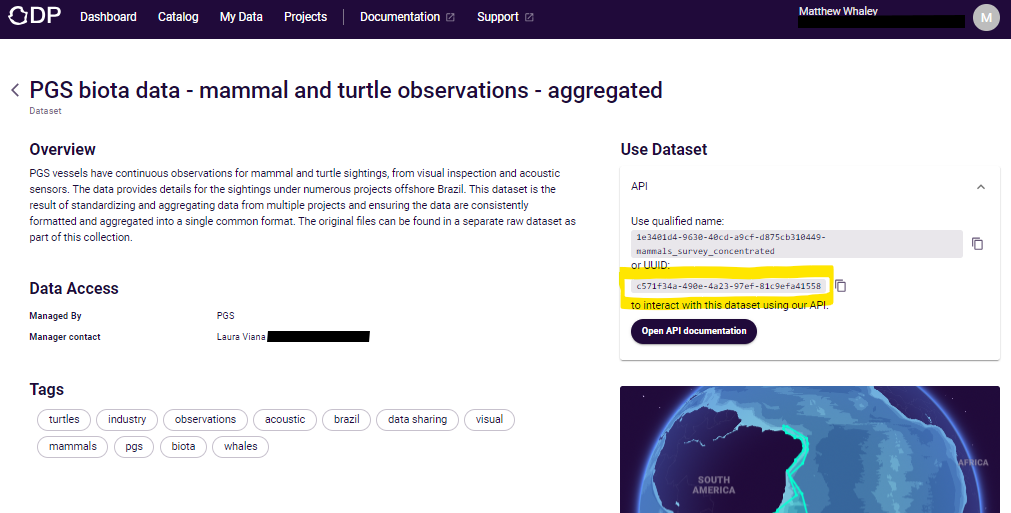

#### Create a geospatial query
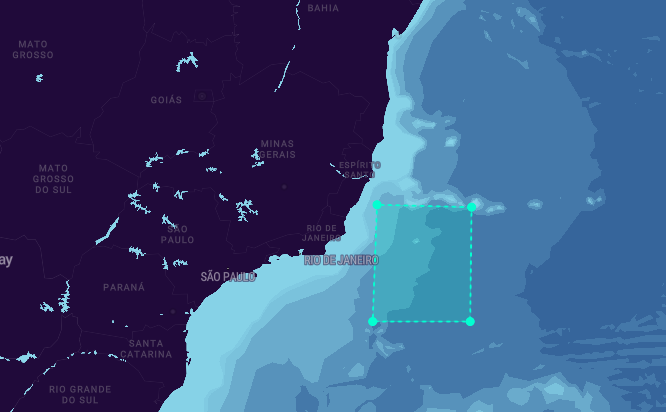

In [4]:
# Enter min and max latitude and longitude values to create a bounding box polygon below. Or use the structure below to add any Well-Known-Text or GeoJSON defined polygon.
bbox_lat_min = -26
bbox_lat_max = -21
bbox_lon_min = -40
bbox_lon_max = -35

In [5]:
query_geometry = f"POLYGON(({bbox_lon_min} {bbox_lat_min}, {bbox_lon_max} {bbox_lat_min}, {bbox_lon_max} {bbox_lat_max}, {bbox_lon_min} {bbox_lat_max}, {bbox_lon_min} {bbox_lat_min}))"
query_geometry

'POLYGON((-40 -26, -35 -26, -35 -21, -40 -21, -40 -26))'

In [6]:
## Request the dataset from the catalog using the UUID:
adcp_dataset = client.catalog.get(("8767dfa3-9ee6-4b9d-8009-d2226be6c505"))
## Verify the name of the dataset requested
adcp_dataset.metadata.display_name
## Request some data from the dataset
adcp_data = client.tabular.select_as_list(adcp_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry]}, limit=10000)

In [7]:
## Note this is a complex query: geospatial and less than 5m depth in a dataset of over a million points, so the request will take ~10-20s
CTD_dataset = client.catalog.get(("7f93ce41-e2ae-4f41-af41-fd7f017efd31"))
CTD_dataset.metadata.display_name
CTD_data = client.tabular.select_as_list(CTD_dataset, filter_query={"#AND": [{'#ST_WITHIN': ['$geometry', query_geometry]},{"#LESS_THAN": ["$Depth_m", 5]}]}, limit=10000)

In [9]:
biota_dataset = client.catalog.get(("ce1065c4-f9eb-4533-8e9a-55621f227709"))
biota_dataset.metadata.display_name
biota_data = client.tabular.select_as_list(biota_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry]}, limit=10000)

## Visualize data

### Plot datapoints from query on a map

In [9]:
simple_pydeck_plot([adcp_data[99::100], CTD_data, biota_data], zoom=6, lat=-23, lon=-39)

{
  "initialViewState": {
    "latitude": -23,
    "longitude": -39,
    "zoom": 6
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "DatetimeUtc": "2012-11-29T01:45:28",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.377795918367347,
          "cur_n_ms-1": 0.154673469387755,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.7252,
              -23.456537
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-11-29T18:10:10",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": 0.445349206349206,
          "cur_n_ms-1": 0.204666666666667,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.621873,
              -23.285346
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-11-30T04:02:49",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": 0.432571428571428,
          "cur_n_ms-1": -0.019,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -38.995632,
              -22.955074
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-11-30T12:35:37",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.0540714285714285,
          "cur_n_ms-1": 0.183214285714286,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -38.458457,
              -22.663876
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-11-30T21:03:56",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.180095238095238,
          "cur_n_ms-1": -0.323269841269841,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -38.845188,
              -22.714246
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-01T05:32:10",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.03325,
          "cur_n_ms-1": -0.140785714285714,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.317244,
              -23.031628
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-01T17:30:35",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.527380952380952,
          "cur_n_ms-1": -0.438095238095239,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.845122,
              -23.573207
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-03T13:34:36",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": 0.393107142857143,
          "cur_n_ms-1": 0.378035714285715,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.627568,
              -23.303984
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-03T22:19:02",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": 0.229521739130435,
          "cur_n_ms-1": 0.177416149068323,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -39.241012,
              -22.8979
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-04T06:48:39",
          "ProjectNumber": 2012105.0,
          "cur_e_ms-1": -0.0231216931216931,
          "cur_n_ms-1": 0.0964074074074074,
          "depth_m": 24.68,
          "geometry": {
            "coordinates": [
              -38.879475,
              -22.530669
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2012-12-04T15:19:26",

### Inspect data
Option 1): work with list of datapoints

In [10]:
#inspecting the fifth item of the list (numbering starts from 0)
biota_data[4:5]

[{'Species': 'Grampus griseus',
  'Family': '',
  'Juveniles': 1.0,
  'Duration': 26.0,
  'geometry': {"coordinates": [-39.726, -23.14066], "type": "Point"},
  'Adults': 14.0,
  'Bathymetry': 2895.0,
  'DateTimeStartedGMT-3': '2020-03-15T08:51:00',
  'Acoustic': False}]

Option 2): convert from the list to a pandas dataframe

In [11]:
pd.DataFrame(biota_data).head()

,Species,Family,Juveniles,Duration,geometry,Adults,Bathymetry,DateTimeStartedGMT-3,Acoustic
0,Stenella attenuata,,2.0,5.0,"{'type': 'Point', 'coordinates': [-39.74145, -...",8.0,2985.0,2020-03-01T10:50:00,False
1,Delphinidae,,0.0,3.0,"{'type': 'Point', 'coordinates': [-39.66613, -...",2.0,2087.0,2020-03-05T06:00:00,False
2,Stenella attenuata,,2.0,31.0,"{'type': 'Point', 'coordinates': [-39.66597, -...",58.0,2021.0,2020-03-06T15:11:00,False
3,Delphinidae,,0.0,12.0,"{'type': 'Point', 'coordinates': [-39.76545, -...",3.0,2050.0,2020-03-07T12:51:00,False
4,Grampus griseus,,1.0,26.0,"{'type': 'Point', 'coordinates': [-39.726, -23...",14.0,2895.0,2020-03-15T08:51:00,False


Option 3): use 'tabular.select_as_dataframe' function of the SDK

In [12]:
biota_df = client.tabular.select_as_dataframe(biota_dataset)
biota_df

,Species,Family,Juveniles,Duration,geometry,Adults,Bathymetry,DateTimeStartedGMT-3,Acoustic
0,Baleia não identificada,Mysticeti,NaN,NaN,"{'type': 'Point', 'coordinates': [-38.956944, ...",1.0,2306.0,2015-09-05T08:52:00,False
1,Baleia não identificada,Mysticeti,NaN,NaN,"{'type': 'Point', 'coordinates': [-39.376667, ...",1.0,3346.0,2015-09-09T08:43:00,False
2,Baleia não identificada,Mysticeti,NaN,NaN,"{'type': 'Point', 'coordinates': [-38.835, -2....",2.0,3017.0,2015-09-10T17:03:00,False
3,Baleia não identificada (Balaenoptera sp),Balaenopteridae,NaN,NaN,"{'type': 'Point', 'coordinates': [-38.5875, -2...",1.0,1958.0,2015-09-15T13:13:00,False
4,Baleia não identificada,Mysticeti,NaN,NaN,"{'type': 'Point', 'coordinates': [-39.375556, ...",1.0,3856.0,2015-09-18T13:52:00,False
...,...,...,...,...,...,...,...,...,...
2101,Golfinho não identificado (Stenella sp),Delphinidae,NaN,36.0,"{'type': 'Point', 'coordinates': [-40.049444, ...",4.0,1254.0,2015-01-17T06:34:00,False
2102,Golfinho não identificado,Delphinidae,NaN,34.0,"{'type': 'Point', 'coordinates': [-40.1075, -2...",4.0,1089.0,2015-01-20T17:07:00,False
2103,Golfinho-pintado-Pantropical (Stenella attenuata),Delphinidae,3.0,40.0,"{'type': 'Point', 'coordinates': [-40.026111, ...",50.0,1280.0,2015-01-26T09:32:00,False
2104,Golfinho não identificado,Delphinidae,NaN,NaN,"{'type': 'Point', 'coordinates': [-42.145833, ...",30.0,100.0,2015-01-29T14:10:00,False


### Plot detailed CTD data

In [13]:
CTD_data_long = client.tabular.select_as_list(CTD_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry]}, limit=50000)

In [14]:
CTD_df = pd.DataFrame(CTD_data_long)

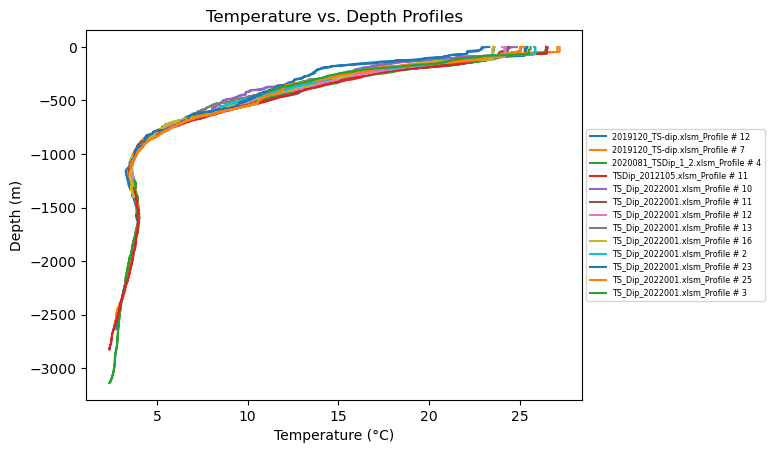

In [15]:
groupedCTD = CTD_df.groupby('ProfileName')
for name, group in groupedCTD:
    plt.plot(group['Temp_C'], group['Depth_m']*-1, label=name)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs. Depth Profiles')
plt.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))  # Set the legend font size to 'small'
plt.show()